In [1]:
import numpy as np
import matplotlib.pyplot as plt

| 주차 | 일정                               | 페이지                                  |
|-----:|-----------------------------------|----------------------------------------|
|    1 | 1장-헬로 파이썬                     | 0p ~ 45p                               |
|    2 | 2장-퍼셉트론                        | 46p ~ 62p                              |
|    3 | 3장-신경망                          | 63p ~ 105p                             |
|    4 | 4장-신경망 학습                     | 106p ~ 146p                            |
|    5 | 5장-오차역전파법                    | 147p ~ 187p (+ Appendix A, 292p ~ 299p) |
|    6 | 중간고사(전)                        |                                        |
|    7 | 중간고사                           |                                        |
|    8 | 6장-학습 관련 기술들               | 188p ~ 226p                            |
|    9 | 7장-합성곱 신경망(CNN)             | 227p ~ 259p                            |
|   10 | 딥러닝                             | 261p ~ 308p                            |
|   11 | 1장-신경망 복습                    | 0p ~ 74p (+ Appendix A, 389p ~ 394p)  |
|   12 | 2장-자연어와 단어의 분산 표현      | 78p ~ 113p (+ Appendix B, 395p ~ 399p) |
|   13 | 기말고사(전)                       |                                        |
|   14 | 기말고사                          |                                        |
|   15 | 3장-word2vec                       | 114p ~ 147p                            |
|   16 | 4장-word2vec 속도 개선             | 148p ~ 189p                            |
|   17 | 5장-순환신경망(RNN)                | 190p ~ 235p                            |
|   18 | 6장-게이트가 추가된 RNN            | 263p ~ 286p (+ Appendix C, 401p ~ 402p)|
|   19 | 7장-RNN을 사용한 문장 생성         | 287p ~ 333p                            |
|   20 | 8장-어텐션                         | 334p ~ 387p                            |

# 11주차

신경망 복습

_0~74p_

---

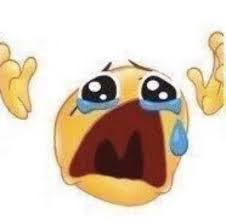
## 수학 & 파이썬 복습

1차원 `numpy.ndarray`

In [2]:
x = np.array([i for i in range(5)])

x, x.__class__, x.shape, x.ndim

(array([0, 1, 2, 3, 4]), numpy.ndarray, (5,), 1)

2차원 `numpy.ndarray`

In [3]:
W = np.array([x, x])
W, W.shape, W.ndim

(array([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]),
 (2, 5),
 2)

**행렬 연산**

원소별 연산

In [4]:
W = np.array([[1, 2, 3], [4, 5, 6]])
X = np.array([[0, 1, 2], [3, 4, 5]])

W + X, W * X

(array([[ 1,  3,  5],
        [ 7,  9, 11]]),
 array([[ 0,  2,  6],
        [12, 20, 30]]))

Broadcasting

In [5]:
W * 10

array([[10, 20, 30],
       [40, 50, 60]])

**note:** broadcasting 충족 조건

In [6]:
def is_broadcastable(arr1: np.ndarray, arr2: np.ndarray) -> bool:
    for a, b in zip(arr1.shape[::-1], arr2.shape[::-1]):
        if a == 1 or b == 1 or a == b:
            pass
        else:
            return False
    return True

is_broadcastable(W, np.array(5)), is_broadcastable(W, np.array([[0, 1, 2]])), is_broadcastable(W, np.array([[0, 1]]))

(True, True, False)

행렬곱 - dot product

(`dot`, `matmul`은 약간의 방식차이만 있을뿐 결과랑 성능 거의 비슷)

In [7]:
np.dot(np.array([[7, 8], [9, 10]]), X)

array([[24, 39, 54],
       [30, 49, 68]])

In [8]:
np.matmul(np.array([[7, 8], [9, 10]]), X)

array([[24, 39, 54],
       [30, 49, 68]])

## 신경망의 추론

**신경망의 구조**

보통 1차원 input에 대하여 모든 노드/뉴런들이 연결된 레이어를... fully connected layer / affine layer / dense layer라고 한다.

$$h = xW + b$$

$x$와 $W$는 서로 합성곱이 되어야하는 행렬이어야한다.
추가로 batch처리($N$개)를 원한다면 x의 형태가 일치하는 상태로 차원이 늘어나야함.

$$x_{x\times 2}\times W_{2\times 4}=h_{N\times 4}$$

**활성화 함수**

위의 "선형 방정식"에다가 비선형의 요소를 추가해 학습이 가능하도록 만들어줌, 대표적으로 시그모이드와 ReLU함수가 있음.

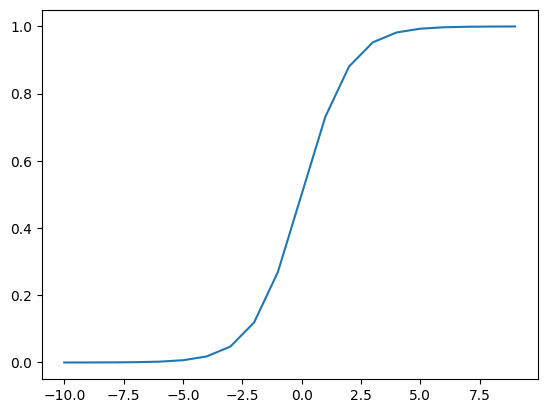

In [9]:
x = np.arange(-10, 10)
y = 1 / (1 + np.exp(-x))

plt.plot(x, y)

In [10]:
from custom.w5_funcs import *

2025-05-22 17:27:38.228545: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-22 17:27:38.231577: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-22 17:27:38.238998: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747902458.252814   83421 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747902458.256723   83421 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747902458.268532   83421 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [11]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)
x, s

(array([[ 0.31958914, -0.61672264],
        [-0.5411935 ,  2.469037  ],
        [-0.42984912, -2.22108272],
        [-1.27181581,  0.82420384],
        [-1.83952207,  1.69193046],
        [-0.30247895,  2.2178791 ],
        [-1.4835854 , -1.57176107],
        [ 0.23312174,  0.1313313 ],
        [-0.24988843,  0.56489801],
        [ 0.00958641,  0.43206279]]),
 array([[-1.19647490e-04, -6.19331211e-05,  7.15930748e-05],
        [ 8.38981531e-05, -2.15493208e-04,  1.83036927e-04],
        [-6.19851425e-04, -4.43495287e-06,  7.85187244e-04],
        [ 1.36184557e-04,  1.94772702e-04,  3.07745802e-04],
        [ 2.54573978e-04,  2.48724043e-04,  3.36769862e-04],
        [ 7.37145840e-05, -1.89336613e-04,  1.60819880e-04],
        [-5.47107949e-04,  2.36007403e-04,  9.81347607e-04],
        [ 2.11085009e-06, -5.42173863e-06,  4.60514921e-06],
        [ 2.47003703e-05, -4.19790618e-05,  4.86887991e-05],
        [ 1.37450614e-05, -3.53043217e-05,  2.99869987e-05]]))

## 신경망의 학습

**손실함수:**

다중 클래스 분류를 위해서는 `Categorical Cross Entropy Error`를 사용한다.
(값의 범위에따라 `Sparse Categorical Cross Entropy Error` 일수도)

오류 구해야하니 이 레이어 안에는 (training 시에) model output과 정답 레이블이 들어간다. 보통은 최종 레이어인 softmax함수와 함께 사용이됨.



$$k^{\text{th}}\text{ softmax output } \to y_k = \frac{\exp(s_k)}{\sum_{i=1}^{n}\exp(s_i)}$$

$$ \text{CCE of } k^{\text{th}} \text{ class res. } t_k \to L = -\sum_{k} t_k \log{y_k} $$

$$ \text{softmax CCE loss} \to -\frac{1}{N}\sum_{n}\sum_{k}t_{nk}\log{y_{nk}} $$

## 다변수 미분과 기울기

전에 배웠던 **연쇄법칙**

맨 처음 변수 하나에 대하여 f를 미분하면 그 사이에 있는것들을 곱하면 다 나가리, 한부분만 미분을 할 수 있다면 그것들을 다 곱하면 전체 미분이 가능!

$$
\frac{df}{dx}
= \frac{df}{du}\,\frac{du}{dx}
= \frac{df}{\cancel{du}}\,\frac{\cancel{du}}{dx}
$$


이를 응용하면 여러 계산 단계를 거친 식들에 대하여 "역전파"를 통해 각 변수들에 대한 미분을 전체 함수에 대하여 할 수 있게 된다.

일단 노드 종류별 예시를 본다면 다음과 같다.

$z = x + y$

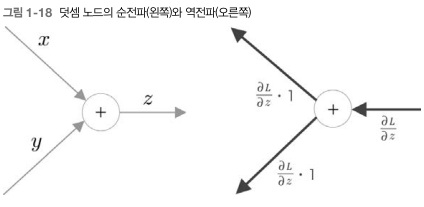

$z = x \times y$

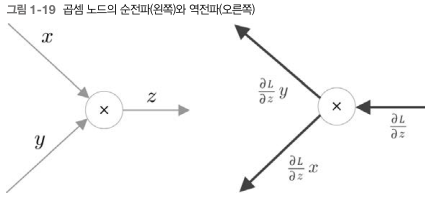

$x \to x_1 + x_2$

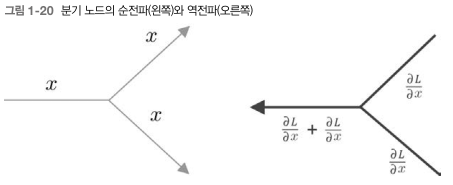

바로 위의 분기노드를 $N$번 쪼개면 다음과 같은 Repeat노드가 됨:

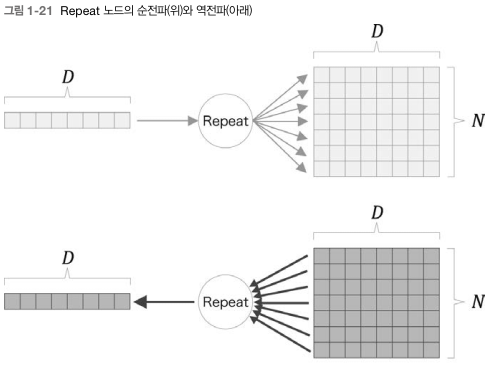

In [12]:
x = np.random.randn(1, 8)
y = np.repeat(x, 7, axis=0)  # x를 7번 반복 -> (7, 8)

x, y, x.shape, y.shape

(array([[ 1.46263975, -1.14801524, -0.85412   , -0.59436766, -0.60393482,
         -0.62155076,  1.39506421, -0.67710676]]),
 array([[ 1.46263975, -1.14801524, -0.85412   , -0.59436766, -0.60393482,
         -0.62155076,  1.39506421, -0.67710676],
        [ 1.46263975, -1.14801524, -0.85412   , -0.59436766, -0.60393482,
         -0.62155076,  1.39506421, -0.67710676],
        [ 1.46263975, -1.14801524, -0.85412   , -0.59436766, -0.60393482,
         -0.62155076,  1.39506421, -0.67710676],
        [ 1.46263975, -1.14801524, -0.85412   , -0.59436766, -0.60393482,
         -0.62155076,  1.39506421, -0.67710676],
        [ 1.46263975, -1.14801524, -0.85412   , -0.59436766, -0.60393482,
         -0.62155076,  1.39506421, -0.67710676],
        [ 1.46263975, -1.14801524, -0.85412   , -0.59436766, -0.60393482,
         -0.62155076,  1.39506421, -0.67710676],
        [ 1.46263975, -1.14801524, -0.85412   , -0.59436766, -0.60393482,
         -0.62155076,  1.39506421, -0.67710676]]),
 (1, 8),
 (7

Repeat의 결과는 사실상 다 더해버리면 된다고 보면 됨. `ndarray.sum(...)`

Sum 노드는 Repeat의 반대인데 역전파는 `ndarray.repeat(...)`라 나누는건 아니고 그냥 같은 값이 분산됨.

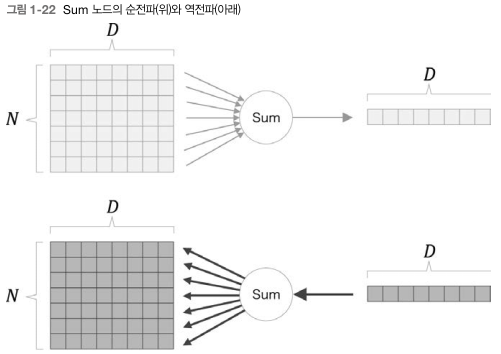

$y = x \otimes W$

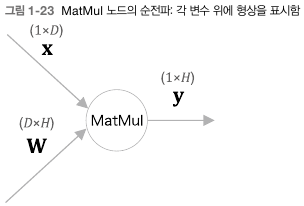

위의 행렬곱의 역전파를 구하려면 역행렬을 찾으면 됨. 그래서 일반 곱셈에서처럼 반대 branch의 값을 곱하는게 아니라 반대 branch의 역행렬을 곱하는거임.

$Z = AB$에 대하여

$\delta{A}=\delta{Z}\otimes B^T$

$\delta{B}=A^T \otimes \delta{Z}$

_여기서 행렬곱의 순서에 주의!_

위의 언급한것들 + 시그모이드 등의 함수들에 대한 구현은... (서재 GH에 있는것들)

In [13]:
from inspect import getsource
from common.layers import Sigmoid, Affine, SoftmaxWithLoss
from IPython.display import display, Code

In [14]:
lines = getsource(Sigmoid)
display(Code(lines, language="python"))

class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx

In [15]:
lines = getsource(Affine)
display(Code(lines, language="python"))

class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        
        self.x = None
        self.original_x_shape = None
        # 가중치와 편향 매개변수의 미분
        self.dW = None
        self.db = None

    def forward(self, x):
        # 텐서 대응
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  # 입력 데이터 모양 변경(텐서 대응)
        return dx

In [16]:
lines = getsource(SoftmaxWithLoss)
display(Code(lines, language="python"))

class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None # 손실함수
        self.y = None    # softmax의 출력
        self.t = None    # 정답 레이블(원-핫 인코딩 형태)
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 정답 레이블이 원-핫 인코딩 형태일 때
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx

## 가중치 갱신

기본적 개념과 과정은 다들 아시겠죠? 일단 DNN은 "경사하강법"을 기본적으로 다 사용.

SGD (Stochastic Grdient Descent)를 구현한 예시 기반. (SGD는 sample batch로 이동하는 대신 sample개별마다 update를 하며 이동함)

In [17]:
from common.trainer import SGD

lines = getsource(SGD)
display(Code(lines, language="python"))

class SGD:

    """확률적 경사 하강법（Stochastic Gradient Descent）"""

    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

In [18]:
from dataset import spiral

x, t = spiral.load_data()

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

뭔 함수가 deprecated된 듯...

In [19]:
from custom import w5_funcs

lines = getsource(w5_funcs)
display(Code(lines, language="python"))

from tensorflow.keras.datasets import mnist

def get_dataset() -> tuple:
    (x_train, t_train), (x_test, t_test) = mnist.load_data()

    x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.
    x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.

    return (x_train, t_train), (x_test, t_test)


from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t) -> dict:
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

---

## 계산 고속화

**비트수**

사용자가 직접 specify하지 않으면 보통 64비트 부동소수점으로 계산이 됨. 앞서 배운 DNN모델의 robustness / resilliance 때문에 소숫점 좀 차이난다고 성능에 큰 영향을 미치지는 않음.

또 최종 추론 / inference시에는 16비트도 문제가 없음. 저장시에 용량면과 성능 면에서 큰 도움이 됨. 

**GPU 사용**

파이썬에서 CUDA를 사용한 CUPY라이브러리를 지원함. 넘파이의 몇몇 계산할때 GPU를 사용해서 큰 행렬계산에 도움이 됨.